# PCA from Scratch

In this notebook, we will start with a toy example to illustarte how PCA works. Then, you will need to apply PCA in order to visualize points from a four-dimensional space on a 2D plot.

Run the cells of this notebook one-by-one, occasionally implementing some parts as instructed.

In [25]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Toy example

In this section, we will consider a toy 2-dimensional dataset to illustrate how PCA helps reduce dimensionality of the data.

First, let's generate a dataset. Run the cell below to obtain a dataset with two features and $n$ examples:

In [26]:
def make_dataset(n=100):

  x1 = 2*np.random.rand(n) - 1
  x2 = x1 + 0.3*(2*np.random.rand(n) - 1)
  X = np.array([x1, x2]).T

  return X

X = make_dataset()
X.shape

(100, 2)

Run the following cell to visualize the data. Can you see what the direction of the maximal variance is?

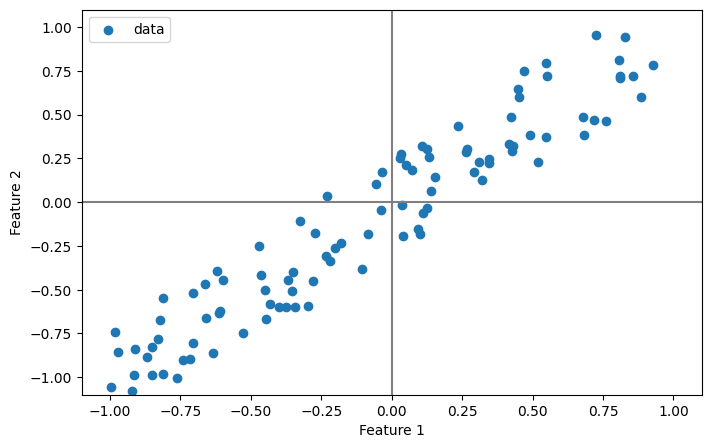

In [27]:
plt.figure(figsize=(8,5))

plt.scatter(X[:,0], X[:,1], label = 'data')

plt.axvline(x = 0, color = 'grey')
plt.axhline(y = 0, color = 'grey')


_ = plt.xlim((-1.1,1.1))
_ = plt.ylim((-1.1,1.1))

_ = plt.legend()
_ = plt.xlabel('Feature 1')
_ = plt.ylabel('Feature 2')

Let's perform PCA step by step.

First, Center the data by subtracting each feature's mean from their values.

In [32]:
# TODO: your code here
m,n = X.shape
X_centered = X - np.mean(X, axis=0)

Now, estimate the covariance matrix and find its eigenvectors and eigenvalues.

In [33]:
# Compute the covariance matrix
# cov_matrix = np.cov(X_centered, rowvar=False)
m, n = X.shape
S = (1./(m-1))*X_centered.T@X_centered
S

array([[0.31291773, 0.30958719],
       [0.30958719, 0.33614376]])

In [35]:
# TODO: your code here
eigen_values , eigen_vectors = np.linalg.eigh(S)

What is the eigenvector corresponding to the largest eigenvalue? This is the first principle component of our data, and it shows the direction of the maximal variance in it.

In [40]:
# TODO: your code here
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

principal_component = sorted_eigenvectors[:,0]
principal_component

array([0.69372728, 0.72023778])

Let's project our two-dimensional data onto the first principle component to obtain a one-dimensional dataset.

In [41]:
# TODO: your code here
X_proj = X_centered@principal_component
X_proj


array([-0.50390634, -0.69039043,  0.49706906, -0.39905585,  0.24838241,
       -0.56782874, -0.76599101,  1.05946546,  1.00923465, -0.58687267,
       -1.05551592, -0.82566552, -0.95573044,  1.31705955,  0.29379121,
        0.85523463, -0.68367476,  0.04412409,  0.72367453,  0.63098735,
       -0.20992201,  0.38578508, -1.0368091 ,  0.11958001, -0.19502454,
        0.4868911 , -0.24042731,  0.43295693, -1.03277716,  0.29064753,
       -0.52785766, -0.79684106, -1.19375884, -0.02549348,  1.15053001,
        0.63488493,  0.3080557 , -0.51398338,  0.63459416, -1.16562214,
        0.61016303,  0.0588801 , -1.13050925,  0.50765498, -0.27469715,
       -0.77294984,  1.18958329, -0.56307564, -0.00496429,  0.85474267,
        0.88466605, -1.10892316, -0.08418701,  0.17154088, -0.28759635,
       -0.60811815, -0.94800707,  0.32987363, -0.18541293,  0.75231585,
        0.41201442,  1.18136063,  1.21883376,  0.20544417, -0.75858499,
        0.96572258,  0.04553761, -1.14619385,  0.94190278, -0.42

Let's visualize the results! Add the line corresponding to the first principle component to the data plot above. Then, plot projections of the original data points onto this line.

In [42]:
# Create the line in the direction of the 1st principle component
kk = np.arange(-1,1,0.01)
pc_line = np.array([k*principal_component for k in kk])

# Project data points onto this line: (x', y') = X_proj*v
data_proj = np.array([x*principal_component for x in X_proj])

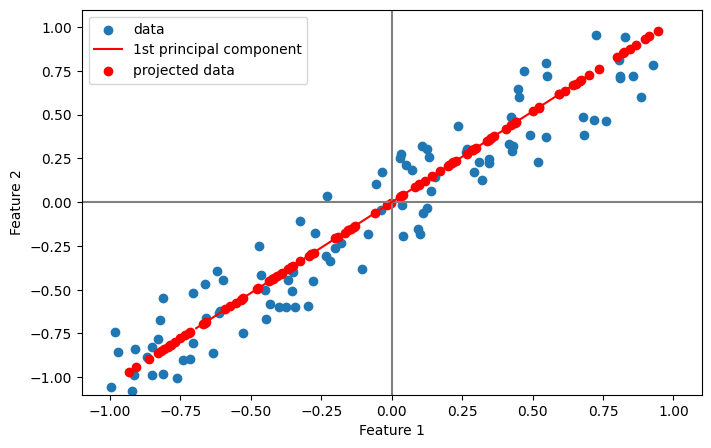

In [45]:
plt.figure(figsize=(8,5))

plt.scatter(X[:,0], X[:,1], label = 'data')

plt.axvline(x=0, color = 'grey')
plt.axhline(y=0, color = 'grey')

plt.plot(pc_line[:,0], pc_line[:,1], color='red', label='1st principal component')
plt.scatter(data_proj[:,0], data_proj[:,1], color='red', label='projected data')

_ = plt.xlim((-1.1,1.1))
_ = plt.ylim((-1.1,1.1))

_ = plt.legend()
_ = plt.xlabel('Feature 1')
_ = plt.ylabel('Feature 2')

Now, repeat the same thing, but this time use the function `make_dataset_2()` below to generate the dataset (go back to the first cell and uncomment the corresponding line).

# PCA on the Iris data

Now that we understand how PCA works on a toy example, we are ready to apply it to a real-world dataset.

In this exercise, you will work with the famous $\texttt{iris}$ dataset.

The data set consists of 50 samples from each of three species of Iris (setosa, virginica and versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

We will first load the data.

More information on the dataset? See [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [46]:
from sklearn.datasets import load_iris
iris = load_iris()

# Columns of X represent examples
X = iris.data
y = iris.target

Each example in the dataset is a point in a four-dimensional space, which makes it impossible to plot the data.

In [47]:
X.shape

(150, 4)

Let's reduce the dimensionality of the data with the help of PCA.

## Implementing PCA

Iimplement the PCA procedure by completing the code below.

You can consult the slides from the lecture and / or practical session to review the PCA algorithm.

In [54]:
def pca(X, n_components=2):
 
  # Center the data
  # (subtract each feature's mean from their values)
  m, n = X.shape
  X_centered = X - np.mean(X, axis=0)

  # Estimate the covariance matrix
  S = (1./(m-1))*X_centered.T@X_centered
  # Find eigenvectors and eigenvalues
  # of the covariance matrix
  eigen_values , eigen_vectors = np.linalg.eigh(S)
  # Sort eigenvalues in the descending order
  # Don't forget to re-order the corresponding eigenvectors!
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalues = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]  
  # Select the first n_components eigenvectors (principle components)


  principal_components = sorted_eigenvectors[:,0:n_components]  
  # Project the data onto the first n_components principle components

  X_proj = np.matmul(X_centered, principal_components)
  return X_proj

Now, let's try our function out! Project the $\texttt{iris}$ data onto a 2D plane.

In [57]:
X_proj = pca(X)
X_proj.shape

(150, 2)

Now, visualize the projected data with a scatter plot! What can you say about the points corresponding to different iris types?

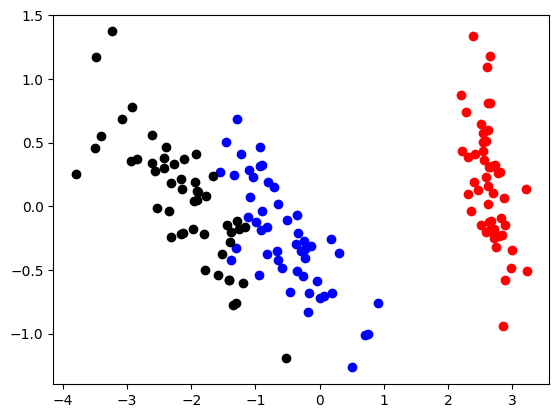

In [56]:
for i, x in enumerate(X_proj):

  # Select color depending on the class
  # (iris type)

  if y[i] == 0:
    c = 'red'
  elif y[i] == 1:
    c = 'blue'
  else:
    c = 'black'

  # Plot the example

  plt.scatter(x[0], x[1], color=c)